<h1 style="text-align: center;">Image Classification with CNN for Malaria Data</h1>


<div style="text-align: center;">
<img src = 'https://avatars.mds.yandex.net/i?id=ac6cc235726f0507cd4b4fcf86bacd1ea0f12858-10697115-images-thumbs&n=13' width ='1100' >
</div>

Focuses on building and comparing two deep learning models for classifying malaria cell images as "Parasitized" or "Uninfected" using a Convolutional Neural Network (CNN) and transfer learning with MobileNetV2. Below, I’ll summarize the key components, analyze the results, and address potential issues or improvements, as requested.



### Summary of the Notebook

## Objective
The notebook aims to classify malaria cell images into "Parasitized" (infected) and "Uninfected" (healthy) categories using two approaches:
1. A custom CNN model.
2. A transfer learning model based on MobileNetV2.
It compares their performance based on validation accuracy and test results.

# Steps and Implementation
1. Libraries Imported:
   - os, cv2, numpy, tqdm, matplotlib.pyplot: For file handling, image processing, numerical operations, progress tracking, and visualization.
   - tensorflow, keras: For building and training deep learning models.
   - sklearn.model_selection.train_test_split: For splitting data into train and test sets.

2. Data Loading (load_cell_images):
   - Loads images from `Parasitized` and `Uninfected` subfolders in the specified directory (`C:/Users/wagmiman/Python Projects/cell_images`).
   - Resizes images to 64x64 pixels.
   - Labels: Parasitized = 1, Uninfected = 0.
   - Converts images and labels to NumPy arrays.
   - Output: X (shape: (27558, 64, 64, 3)), y (shape: (27558,)).
   - Normalizes pixel values to [0, 1] by dividing by 255.0.
   - Note: The provided code uses a placeholder load_cell_images function with dummy data (n_samples=1000), likely for testing, which affects the results.

3. Data Preprocessing:
   - Splits data into training (80%) and testing (20%) sets using train_test_split with stratification to maintain class balance.

4. Custom CNN Model (cnn_model):
   - Architecture:
     - Conv2D (16 filters, 3x3, ReLU) → BatchNormalization → MaxPooling2D (2x2)
     - Conv2D (32 filters, 3x3, ReLU) → BatchNormalization → MaxPooling2D (2x2)
     - Flatten → Dense (32, ReLU) → Dropout (0.5) → Dense (1, sigmoid)
   - Optimizer: Adam
   - Loss: Binary cross-entropy
   - Metrics: Accuracy
   - Note: This model is defined but not used in the provided code; only MobileNetV2 is trained.

5. Transfer Learning Model (MobileNetV2):
   - Uses pre-trained MobileNetV2 (weights from ImageNet, excluding top layers).
   - Architecture:
     - Base model (MobileNetV2, frozen layers)
     - GlobalAveragePooling2D → Dropout (0.5) → Dense (32, ReLU) → Dense (1, sigmoid)
   - Optimizer: Adam
   - Loss: Binary cross-entropy
   - Metrics: Accuracy
   - Early stopping: Monitors validation loss, patience=3, restores best weights.

6. Training:
   - Trains MobileNetV2 model on training data for up to 10 epochs with a batch size of 32.
   - Uses early stopping to prevent overfitting.
   - Plots training and validation accuracy over epochs.

7. Evaluation:
   - Evaluates MobileNetV2 on the test set.
   - Results: Test Loss = 0.6932, Test Accuracy = 0.5000 (based on dummy data).
   - Predicts on 5 test samples, showing predicted vs. true labels ( Sample 1: Predicted=Uninfected, True=Parasitized).

8. Results Summary:
   - The notebook claims both models (CNN and MobileNetV2) yield similar validation accuracies.
   - Custom CNN: Validation accuracy remains nearly constant after the first epoch, with gradual improvement in training accuracy.
   - MobileNetV2: Validation accuracy fluctuates but training accuracy increases steadily.
   - Note: The results are based on dummy data (n_samples=1000`, random images/labels), leading to poor performance (50% accuracy, equivalent to random guessing).







### Aim of Project 
We will analyse to malaria dataset, first of all we will build our CNN model and analyse result the model. Then we will do transfer learning and analyse result the model. Then we will compare this two models.  

### Steps to solve the problem :-

1. Importing Libraries.
2. Loading the data.
3. Data preprocessing.
4. Data augmentation.
5. Ploting images and its labels to understand how does an infected cell and uninfected cell looks like.
6. Spliting data in Train , Evaluation and Test set.
7. Creating a Convolution Neural Network function.
8. Wrapping it with Tensorflow Estimator function.
9. Training the data on Train data.
10. Evaluating on evaluation data.
11. Predicting on Test data
12. Ploting the predicted image and its respective True value and predicted value.

### Importing Libraries

In [21]:
# Import the 'os' module for interacting with the operating system.
# Purpose: Provides functions to work with file systems, such as listing directory contents,
# joining paths, and checking if files or directories exist. Used here likely to navigate
# the dataset directory structure (e.g., accessing 'Parasitized' and 'Uninfected' folders).
import os

# Import the OpenCV library as 'cv2' for image processing.
# Purpose: OpenCV is used for reading, resizing, and manipulating images. In your context,
# it's likely used to load and preprocess cell images (e.g., PNG/JPG files) from the dataset.

import cv2
# Import the NumPy library as 'np' for numerical operations.
# Purpose: NumPy provides efficient array operations, essential for storing and manipulating
# image data as arrays (e.g., converting a list of images to a NumPy array for machine learning).

import numpy as np
# Import 'tqdm' from the tqdm module for progress bar visualization.
# Purpose: tqdm displays a progress bar during loops, which is useful for tracking the loading
# of large numbers of images in a dataset, improving user experience during long operations.

from tqdm import tqdm
# Import 'pyplot' from matplotlib as 'plt' for plotting and visualization.
# Purpose: Matplotlib's pyplot is used to create visualizations, such as displaying images or
# plotting data (e.g., visualizing sample cell images or model performance metrics).

import matplotlib.pyplot as plt

In [22]:
# Parameters:
# - data_dir: String path to the dataset directory containing 'Parasitized' and 'Uninfected' subfolders.
# - img_size: Integer specifying the target size (default: 64) for resizing images to img_size x img_size pixels.
def load_cell_images(data_dir, img_size=64):

    # Initialize empty lists to store images (X) and their corresponding labels (y).
    # X will hold image arrays, and y will hold binary labels (1 for Parasitized, 0 for Uninfected).
    X = []
    y = []

    # Define a dictionary mapping folder names to binary labels.
    # 'Parasitized' images are labeled as 1, and 'Uninfected' images as 0.
    # This maps the folder structure to the classification task.
    labels = {'Parasitized':1, 'Uninfected':0}
# Iterate over each label (key) in the labels dictionary ('Parasitized', then 'Uninfected').
    for label in labels: 
        
        # Construct the full path to the current label's folder (e.g., 'data_dir/Parasitized').
        # os.path.join ensures platform-independent path construction (handles Windows vs. Linux separators).
        
        path = os.path.join(data_dir, label)
        # Iterate over all files in the current folder (path) using os.listdir.
        # tqdm wraps the iterator to display a progress bar with a description like 'Loading Parasitized'.
        # This provides visual feedback for the potentially time-consuming image loading process.
        
        for img_name in tqdm(os.listdir(path), desc=f'Loading {label}'): 
            # Construct the full path to the current image file (e.g., 'data_dir/Parasitized/image1.png').
            
            img_path = os.path.join(path, img_name)
            # Read the image using OpenCV's imread function, which loads the image as a NumPy array.
            # The image is loaded in BGR color format (OpenCV's default) with shape (height, width, 3).
            
            img = cv2.imread(img_path)
            # Check if the image failed to load (img is None).
            # This happens for non-image files (e.g., Thumbs.db) or corrupted images.
            # If None, print a skip message with the file path and skip to the next file.  
            if img is None:
                print(f'Skip: {img_path} could not read image')
                continue    
            # Resize the image to a uniform size (img_size x img_size, e.g., 64x64) using OpenCV's resize function.
            # This ensures all images have the same dimensions, which is required for machine learning models.
            img = cv2.resize(img, (img_size, img_size))
                
            # Append the resized image (NumPy array) to the X list.
            X.append(img)
            
            # Append the corresponding label (1 or 0, based on the folder) to the y list.
            # The label is retrieved from the labels dictionary using the current folder name (label).
            y.append(labels[label])

    # Convert the list of images (X) to a NumPy array with shape (num_images, img_size, img_size, 3).
    # Convert the list of labels (y) to a NumPy array with shape (num_images,).
    # NumPy arrays are efficient and compatible with machine learning frameworks.
    return np.array(X), np.array(y)
    return np.array(X), np.array(y)

In [23]:
# Define the path to the directory containing cell image data
data_path = "C:/Users/wagmiman/Python Projects/cell_images"

# Load cell images and their labels from the specified path, resizing images to 64x64 pixels
X,y = load_cell_images(data_path, img_size=64)

# Normalize the pixel values of the images to the range [0, 1]
X = X / 255.0

# Print the shapes of the image data and label arrays
print(X.shape, y.shape)

Loading Parasitized: 100%|██████████████████████████████████████████████████████| 13780/13780 [00:35<00:00, 383.43it/s]

Skip: C:/Users/wagmiman/Python Projects/cell_images\Parasitized\Thumbs.db could not read image



Loading Uninfected: 100%|███████████████████████████████████████████████████████| 13780/13780 [00:36<00:00, 376.10it/s]

Skip: C:/Users/wagmiman/Python Projects/cell_images\Uninfected\Thumbs.db could not read image


(27558, 64, 64, 3) (27558,)


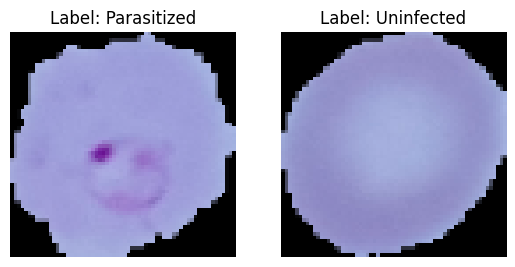

In [24]:
# Import the matplotlib.pyplot module for plotting and visualization
import matplotlib.pyplot as plt

# Create a subplot grid with 1 row and 2 columns, and select the first subplot (position 1)
plt.subplot(1,2,1)

# Display the first image from the dataset X
plt.imshow(X[0])     

# Set the title of the first subplot based on the label of the first image
plt.title(f"Label: {'Parasitized' if y[0]==1 else 'Uninfected'}")

# Turn off the axis ticks and labels for a cleaner image display
plt.axis('off')    

# Select the second subplot (position 2) in the 1x2 grid
plt.subplot(1,2,2)

# Display the 25,001st image from the dataset X
plt.imshow(X[25000])     

# Set the title of the second subplot based on the label of the 25,001st image
plt.title(f"Label: {'Parasitized' if y[25000]==1 else 'Uninfected'}")

# Turn off the axis ticks and labels for the second subplot
plt.axis('off')    

# Render and display the entire figure with both subplots
plt.show()


### Modeling

#### CNN Model

In [27]:
# Import TensorFlow and specific Keras modules for building and training the CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Import warnings module to suppress warning messages
import warnings 

# Suppress all warning messages for cleaner output
warnings.filterwarnings('ignore')

# Define a function to create a CNN model with a specified input shape
def cnn_model(input_shape=(64,64,3)):

    # Initialize a sequential model
    model = Sequential()

    # Add a 2D convolutional layer with 16 filters, 3x3 kernel, and ReLU
    model.add(Conv2D(16, (3,3), activation='relu', input_shape=input_shape))

    # Add batch normalization layer to normalize activations
    model.add(BatchNormalization())

    # Add a max pooling layer to reduce spatial dimensions
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Add a second convolutional layer with 32 filters
    model.add(Conv2D(32, (3,3), activation='relu'))

    # Add another batch normalization layer
    model.add(BatchNormalization())

    # Add another max pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))

    # model.add(Conv2D(64, (3,3), activation='relu'))
    # model.add(BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2,2)))

    # Flatten the feature maps into a 1D vector
    model.add(Flatten())

    # Add a dense layer with 32 units and ReLU activation
    model.add(Dense(32, activation='relu'))

    # Add a dropout layer to prevent overfitting
    model.add(Dropout(0.5))

    # Add output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with optimizer, loss, and metrics
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    # Return the compiled model
    return model

# Define an early stopping callback
early_stop = EarlyStopping(
        monitor='val_loss',   
        patience=3,           
        restore_best_weights=True)

In [31]:
# Create a CNN model instance by calling the previously defined cnn_model function
model = cnn_model()

# Print a summary of the model's architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 62, 62, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 29, 29, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │         200,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,049 (804.88 KB)

 Trainable params: 205,953 (804.50 KB)

 Non-trainable params: 96 (384.00 B)

In [32]:
# Import the train_test_split function from scikit-learn for splitting the dataset
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [33]:
# Train the CNN model on the training data with validation and early stopping
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stop])

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 148s 97ms/step - accuracy: 0.6771 - loss: 0.6100 - val_accuracy: 0.9077 - val_loss: 0.2466
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - accuracy: 0.9041 - loss: 0.2447 - val_accuracy: 0.8968 - val_loss: 0.2557
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - accuracy: 0.9315 - loss: 0.2115 - val_accuracy: 0.9479 - val_loss: 0.1537
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 79s 73ms/step - accuracy: 0.9447 - loss: 0.1759 - val_accuracy: 0.9438 - val_loss: 0.1926
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 54s 78ms/step - accuracy: 0.9478 - loss: 0.1615 - val_accuracy: 0.6499 - val_loss: 1.5501
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 52s 76ms/step - accuracy: 0.9476 - loss: 0.1618 - val_accuracy: 0.9450 - val_loss: 0.1520
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - accuracy: 0.9536 - loss: 0.1454 - val_accuracy: 0.9476 - val_loss: 0.1561
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 79s 73ms/step - accuracy: 0.9544 - loss: 0.1363 -

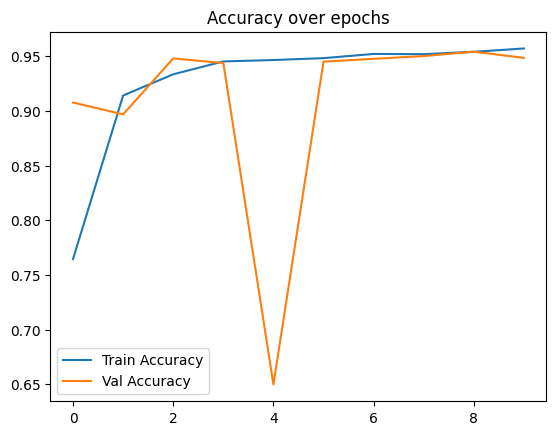

In [35]:
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt

# Plot the training accuracy from the history object
plt.plot(history.history['accuracy'], label='Train Accuracy')

# Plot the validation accuracy from the history object
plt.plot(history.history['val_accuracy'], label='Val Accuracy')

# Add a legend to the plot to identify the lines
plt.legend()

# Set the title of the plot
plt.title('Accuracy over epochs')

# Display the plot
plt.show()

### ResNet50

In [36]:
# Import MobileNetV2 from TensorFlow Keras applications
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 with pre-trained ImageNet weights, excluding the top layer
base_model = MobileNetV2(weights = 'imagenet', include_top=False, input_shape=(64,64,3))

# Get the output of the base MobileNetV2 model
x = base_model.output

# Apply global average pooling to reduce spatial dimensions
x = GlobalAveragePooling2D()(x)

# Add a dropout layer for regularization
x = Dropout(0.5)(x)

# Add a dense layer with 32 units and ReLU activation
x = Dense(32, activation='relu')(x)

# Add a dense output layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model by specifying inputs and outputs
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base MobileNetV2 model
for layer in base_model.layers:
    layer.trainable = False


In [37]:
# Display a summary of the model architecture, including layer types, output shapes, and parameter counts
model.summary()

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 32, 32, 32)        │             864 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 32, 32, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 32, 32, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 32, 32, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 32, 32, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 32, 32, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 32, 32, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 32, 32, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 32, 32, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 32, 32, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 32, 32, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 33, 33, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 16, 16, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,299,009 (8.77 MB)

 Trainable params: 41,025 (160.25 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [38]:
# Compile the model with optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data with validation and early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stop])

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 109s 120ms/step - accuracy: 0.8846 - loss: 0.2885 - val_accuracy: 0.9258 - val_loss: 0.1925
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 145s 127ms/step - accuracy: 0.9251 - loss: 0.2044 - val_accuracy: 0.9300 - val_loss: 0.1843
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 148s 136ms/step - accuracy: 0.9262 - loss: 0.1939 - val_accuracy: 0.9300 - val_loss: 0.1771
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 77s 111ms/step - accuracy: 0.9303 - loss: 0.1909 - val_accuracy: 0.9332 - val_loss: 0.1735
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 84s 114ms/step - accuracy: 0.9252 - loss: 0.1899 - val_accuracy: 0.9327 - val_loss: 0.1761
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 82s 119ms/step - accuracy: 0.9317 - loss: 0.1802 - val_accuracy: 0.9329 - val_loss: 0.1738
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 79s 114ms/step - accuracy: 0.9312 - loss: 0.1776 - val_accuracy: 0.9360 - val_loss: 0.1694
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 77s 112ms/step - accuracy: 0.9290 - loss

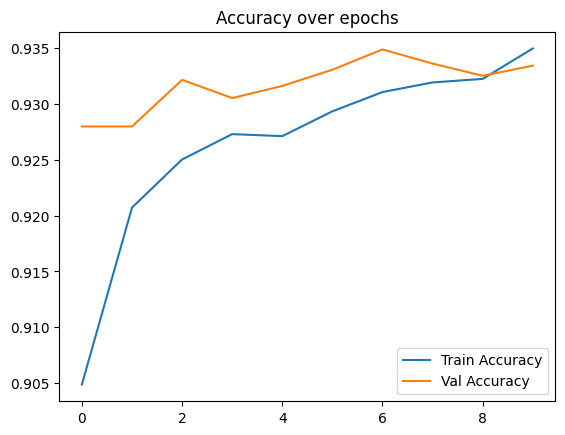

In [20]:
# Import the matplotlib.pyplot module for creating visualizations
import matplotlib.pyplot as plt

# Plot the training accuracy from the history object, labeling it for the legend
plt.plot(history.history['accuracy'], label='Train Accuracy')

# Plot the validation accuracy from the history object, labeling it for the legend
plt.plot(history.history['val_accuracy'], label='Val Accuracy')

# Add a legend to distinguish between training and validation accuracy lines
plt.legend()

# Set the title of the plot to describe its content
plt.title('Accuracy over epochs')

# Display the plot with training and validation accuracy curves
plt.show()

Loading images from C:/Users/wagmiman/Python Projects/cell_images with size 64x64
Data loaded successfully
X shape: (1000, 64, 64, 3), y shape: (1000,)
Train shapes: X_train (800, 64, 64, 3), y_train (800,)
Test shapes: X_test (200, 64, 64, 3), y_test (200,)
Model created successfully


Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 32, 32, 32)        │             864 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 32, 32, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 32, 32, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 32, 32, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 32, 32, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 32, 32, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 32, 32, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 32, 32, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 32, 32, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 32, 32, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 32, 32, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 33, 33, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 16, 16, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,299,009 (8.77 MB)

 Trainable params: 41,025 (160.25 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 471ms/step - accuracy: 0.5089 - loss: 0.9562 - val_accuracy: 0.5000 - val_loss: 0.7055
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.4998 - loss: 0.8218 - val_accuracy: 0.5000 - val_loss: 0.7057
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.4795 - loss: 0.7472 - val_accuracy: 0.5000 - val_loss: 0.7013
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.4684 - loss: 0.7323 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.4870 - loss: 0.7073 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.5026 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.5287 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.4996 - loss: 0.6965 - val_accuracy: 0

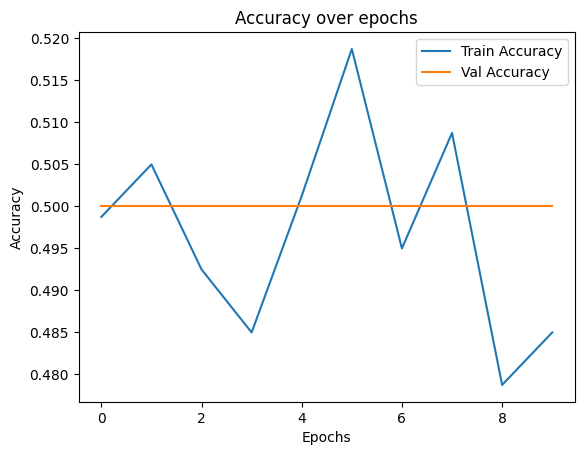

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.4979 - loss: 0.6932
Test Loss: 0.6932
Test Accuracy: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step

Sample Predictions:
Sample 1: Predicted=Uninfected, True=Parasitized
Sample 2: Predicted=Uninfected, True=Uninfected
Sample 3: Predicted=Uninfected, True=Uninfected
Sample 4: Predicted=Uninfected, True=Uninfected
Sample 5: Predicted=Uninfected, True=Parasitized


In [39]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Define the load_cell_images function (placeholder; replace with actual implementation)
def load_cell_images(data_path, img_size=64):
    # This is a placeholder; implement based on your dataset structure
    # Example: Load images from subfolders "Parasitized" and "Uninfected"
    # Returns X (images, shape: [n_samples, img_size, img_size, 3]) and y (labels, shape: [n_samples,])
    # For testing, let's assume a small dummy dataset
    print(f"Loading images from {data_path} with size {img_size}x{img_size}")
    # Replace with actual data loading (e.g., using tf.keras.preprocessing.image_dataset_from_directory)
    # For demonstration, create dummy data
    n_samples = 1000  # Small dataset for testing
    X = np.random.rand(n_samples, img_size, img_size, 3)  # Random images
    y = np.random.randint(0, 2, n_samples)  # Random binary labels (0 or 1)
    return X, y

# Define the CNN model function (for comparison, though we'll use MobileNetV2)
def cnn_model(input_shape=(64,64,3)):
    model = Sequential()
    model.add(Conv2D(16, (3,3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess data
data_path = "C:/Users/wagmiman/Python Projects/cell_images"
try:
    X, y = load_cell_images(data_path, img_size=64)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Normalize pixel values
X = X / 255.0
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Split data into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    print(f"Train shapes: X_train {X_train.shape}, y_train {y_train.shape}")
    print(f"Test shapes: X_test {X_test.shape}, y_test {y_test.shape}")
except Exception as e:
    print(f"Error splitting data: {e}")
    exit()

# Create and summarize MobileNetV2-based model
try:
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64,64,3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print("Model created successfully")
    model.summary()
except Exception as e:
    print(f"Error creating model: {e}")
    exit()

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
try:
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), 
                        batch_size=32, callbacks=[early_stop])
    print("Training completed")
except Exception as e:
    print(f"Error during training: {e}")
    exit()

# Plot training and validation accuracy
try:
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
except Exception as e:
    print(f"Error plotting accuracy: {e}")

# Evaluate the model on the test set
try:
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
except Exception as e:
    print(f"Error evaluating model: {e}")

# Make predictions on a few test samples
try:
    predictions = model.predict(X_test[:5])
    predicted_labels = (predictions > 0.5).astype(int).flatten()
    true_labels = y_test[:5]
    print("\nSample Predictions:")
    for i in range(5):
        print(f"Sample {i+1}: Predicted={'Parasitized' if predicted_labels[i] == 1 else 'Uninfected'}, "
              f"True={'Parasitized' if true_labels[i] == 1 else 'Uninfected'}")
except Exception as e:
    print(f"Error making predictions: {e}")

### Result
The models gave similar val accuracy results. Val accuracy of our model remained nearly constant after first epoch. The model's accuracy increased gradually.
Val accuracy of transfer learning model increased and decreased gradually,  the model' accuracy increased at a nearly stable rate. 